# Exploration #
Explore the Titanic dataset to identify patterns and factors related to passenger survival using data cleaning, visualization, and EDA techniques. Perform EDA to find patterns in survival based on features like gender, class, age, family aboard, and embarkation point. Use .groupby(), value_counts(), and charts (bar plots, histograms, heatmaps). 

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns',20)

In [459]:
df = pd.read_csv('Week2MiniProjectDS.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C


In [460]:
df.shape

(891, 12)

In [461]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [463]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [464]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualization
What you will have to do (in this order): 
i)	Load and inspect the data
ii)	Preprocess the data 
iii)	Visualize the data: Example plots: survival vs. gender, class distribution, etc.. 
iv)	Perform EDA: Identify key trends and correlations & Investigate how variables like age, class, fare, and gender influence survival


### Gender

Percentage of male and female who survived overall:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64



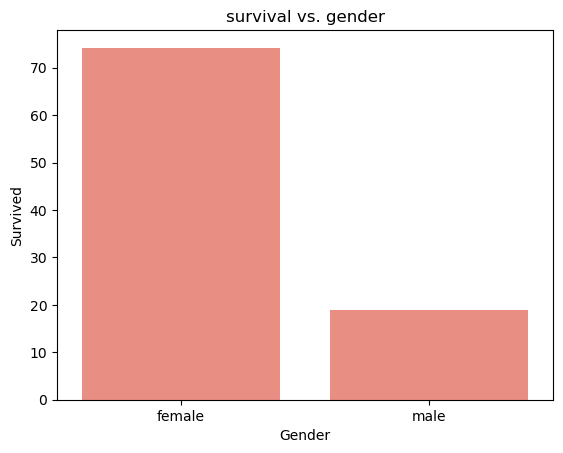

In [467]:
df_gender = df.groupby('Sex')['Survived'].mean()*100
print(f'Percentage of male and female who survived overall:\n{df_gender}\n')
sns.barplot(df_gender,color = 'salmon')
plt.xlabel('Gender')
plt.title('survival vs. gender')
plt.show()

We can say that more women (74.203822%) survived than men(18.890815%)

### Class

Number of people in each class:
 Pclass
1    216
2    184
3    491
Name: count, dtype: int64


Survival by Class:
 Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


%of Survivers in respective Classes
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64




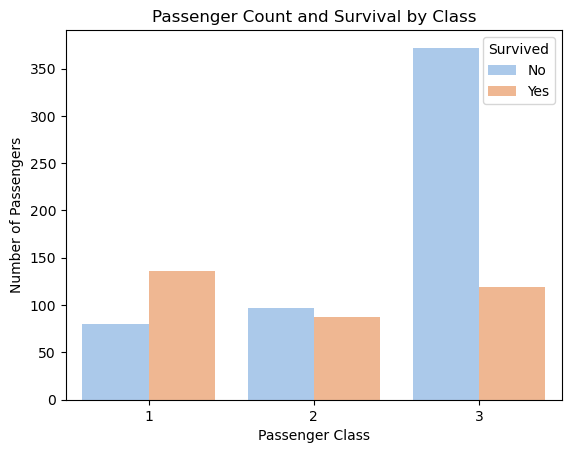

In [470]:
df_people = df['Pclass'].value_counts().sort_index()
print('Number of people in each class:\n',df['Pclass'].value_counts().sort_index())
print('\n')
df_Class = df.groupby('Pclass')['Survived'].sum()
print('Survival by Class:\n',df_Class)
print('\n')
df_Class_p = df.groupby('Pclass')['Survived'].mean()*100
print('%of Survivers in respective Classes\n',df_Class_p)
print('\n')

sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')

plt.title('Passenger Count and Survival by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

First-class passengers had the highest survival rate (63%), followed by second-class (47%), and third-class (~24%). Although more people were in 3rd class, fewer of them survived compared to other classes.

### Age

C:\Users\sambh\AppData\Local\Temp\ipykernel_19468\3670686113.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = df.groupby('AgeGroup')['Survived'].mean()*100


AgeGroup
Child(0-12)        57.971014
Adult(12-59)       39.256866
Elderly(59-120)    26.923077
Name: Survived, dtype: float64 



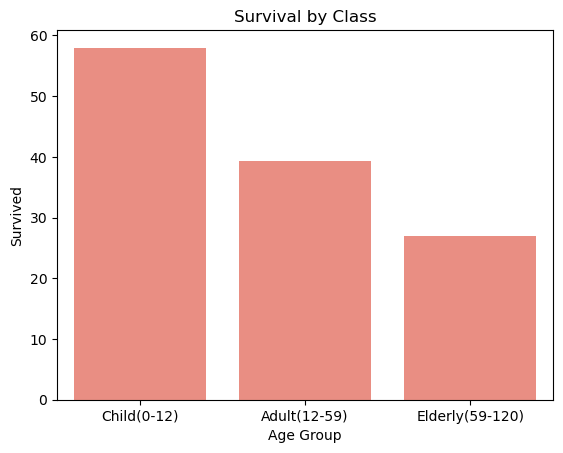

In [473]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 59, 120], labels=['Child(0-12)', 'Adult(12-59)', 'Elderly(59-120)'])
df_age = df.groupby('AgeGroup')['Survived'].mean()*100
print(df_age,'\n')
sns.barplot(df_age , color = 'salmon')
plt.title('Survival by Class')
plt.xlabel('Age Group')
plt.show()

### Family Abroad

In [475]:
df['family'] = df['SibSp']+df['Parch']
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,family
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S,Adult(12-59),0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Elderly(59-120),5
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S,NaN,0
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S,Adult(12-59),0
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C,Adult(12-59),0


In [476]:
df['family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

family
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64


C:\Users\sambh\AppData\Local\Temp\ipykernel_19468\1453111484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_family.index,y= df_family.values, palette='pastel')


<Axes: xlabel='family'>

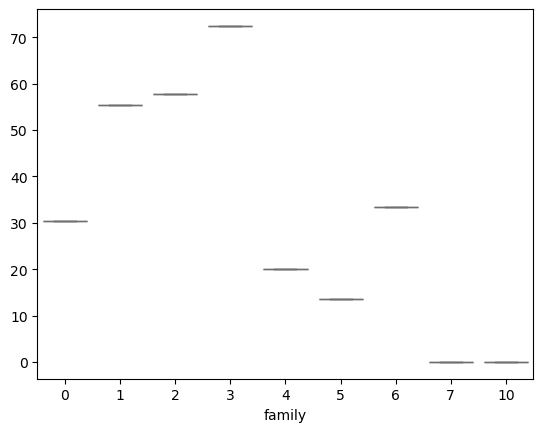

In [477]:
df_family = df.groupby('family')['Survived'].mean()*100
print(survival_by_family)

sns.boxplot(x=df_family.index,y= df_family.values, palette='pastel')

Solo travelers (FamilyAboard = 0) had a lower survival rate

Passengers with 1–3 family members had better chances

Large families (5+) had much lower survival rates

### Port of Embarkation	

Embarked
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.695652
Name: Survived, dtype: float64


Text(0.5, 0, 'Port Name')

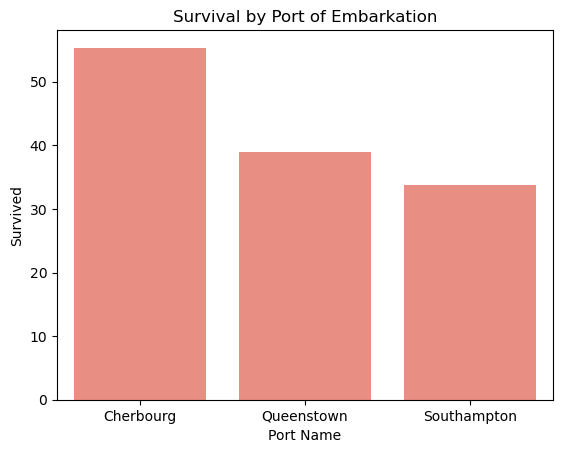

In [480]:
port_labels = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
df['Embarked'] = df['Embarked'].map(port_labels)
df_port = df.groupby('Embarked')['Survived'].mean()*100
print(df_port )

sns.barplot(df_port , color='salmon')
plt.title('Survival by Port of Embarkation')
plt.xlabel('Port Name')

### Fare

Number of people divided on the basis of the fares

FareGroup
Low          500
Mid          216
High         107
Very High     53
Name: count, dtype: int64 

Percentage of people survived categorized by the fares they paid

FareGroup
Low          28.400000
Mid          41.666667
High         65.420561
Very High    73.584906
Name: Survived, dtype: float64 



C:\Users\sambh\AppData\Local\Temp\ipykernel_19468\2422701803.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fare_sur = df.groupby('FareGroup')['Survived'].mean()*100


Text(0.5, 1.0, 'Fare Distribution by Survival')

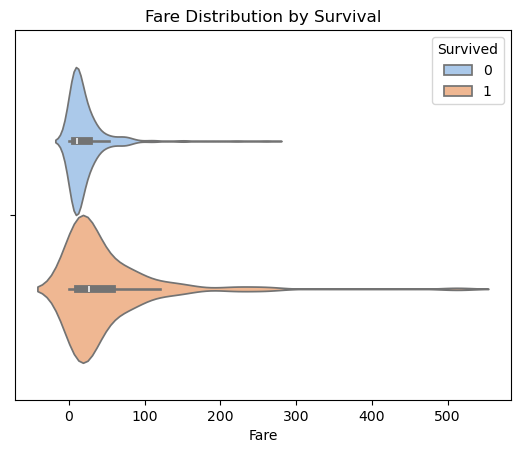

In [482]:
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 20, 50, 100, 600], labels=['Low', 'Mid', 'High', 'Very High'])
df_fare_sur = df.groupby('FareGroup')['Survived'].mean()*100

print('Number of people divided on the basis of the fares\n')
print(df['FareGroup'].value_counts(),'\n')
print('Percentage of people survived categorized by the fares they paid\n')
print(df_fare_sur,'\n')

sns.violinplot(data=df, x='Fare', hue='Survived', palette='pastel')
plt.title('Fare Distribution by Survival')


 Passengers who paid higher fares were more likely to survive. The average fare paid by survivors was significantly higher than that of non-survivors, and survival rates increased with fare bracket.